<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/MNIST_Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset for Handwritten Digit Recognition
Modified National Institute of Standards and Technology (MNIST) database.

The MNIST dataset consists images of handwritten digit from a variety of scanned documents from American Census Bureau employees and American high school students. 

In this dataset 60,000 images are used to train the model and 10,000 images are used to test the model. There are 10 digits (0 to 9) or 10 classes to predict."

References:

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

https://www.analyticsvidhya.com/blog/2021/06/image-processing-using-cnn-a-beginners-guide/

https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/



###load libraries

In [11]:
# import libraries
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn
from sklearn.metrics import roc_curve, auc

# Tensorflow
# import the dataset
from tensorflow.keras.datasets import mnist
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

from keras.utils.vis_utils import plot_model


The training set contains 60k images and the testing set contains 10k images.

The training input vector is of the dimension [60000 X 28 X 28].

The training output vector is of the dimension [60000 X 1].

Each individual input vector is of the dimension [28 X 28].

Each individual output vector is of the dimension [1].

#MNIST dataset
Modified National Institute of Standards and Technology database

The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [Wikipedia]. 

In [12]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [13]:
#reproducible results
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(42)

x_train and x_test parts contain greyscale RGB codes (from 0 to 255) 
y_train and y_test parts contain labels from 0 to 9 which represents which number they actually are.

8


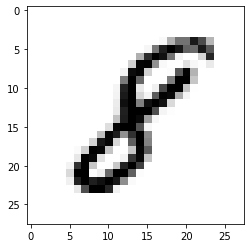

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

We need the shape of the dataset to channel it to the convolutional neural network.

In [15]:
x_train.shape

(60000, 28, 28)

###Adjusting 3-dim array for Keras API

In [16]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Sequential Model from Keras and add Conv2D, MaxPooling, Flatten, Dropout, and Dense layers. I have already talked about Conv2D, Maxpooling, and Dense layers. In addition, Dropout layers fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D arrays before building the fully connected layers.

In [17]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
# Batch normalization to stabalize and accelerate the learning process
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
# Batch normalization to stabalize and accelerate the learning process
model.add(BatchNormalization())
model.add(Dense(10,activation=tf.nn.softmax))

In [18]:
# compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
# baseline CNN model
model_baseline = model.fit(x=x_train,y=y_train, epochs=10, batch_size=32, verbose=2)
print(model_baseline)
#evaluating the baseline model 
baseline = model.evaluate(x_test, y_test)
print(baseline)

Epoch 1/10
1875/1875 - 33s - loss: 0.2004 - accuracy: 0.9401 - 33s/epoch - 17ms/step
Epoch 2/10
1875/1875 - 31s - loss: 0.0826 - accuracy: 0.9746 - 31s/epoch - 17ms/step
Epoch 3/10
1875/1875 - 32s - loss: 0.0579 - accuracy: 0.9820 - 32s/epoch - 17ms/step
Epoch 4/10
1875/1875 - 32s - loss: 0.0441 - accuracy: 0.9857 - 32s/epoch - 17ms/step
Epoch 5/10
1875/1875 - 32s - loss: 0.0346 - accuracy: 0.9882 - 32s/epoch - 17ms/step
Epoch 6/10
1875/1875 - 33s - loss: 0.0309 - accuracy: 0.9898 - 33s/epoch - 17ms/step
Epoch 7/10
1875/1875 - 33s - loss: 0.0261 - accuracy: 0.9913 - 33s/epoch - 18ms/step
Epoch 8/10
1875/1875 - 33s - loss: 0.0226 - accuracy: 0.9923 - 33s/epoch - 17ms/step
Epoch 9/10
1875/1875 - 33s - loss: 0.0179 - accuracy: 0.9938 - 33s/epoch - 17ms/step
Epoch 10/10
1875/1875 - 32s - loss: 0.0175 - accuracy: 0.9939 - 32s/epoch - 17ms/step
313/313 [==============================] - 3s 8ms/step - loss: 0.0779 - accuracy: 0.9814
[0.07788829505443573, 0.9814000129699707]


Adding Batch normalization after the convolutional and final fully connected layer

In [27]:
# batch normalization CNN model (epoch 10, batch size 32)
model_batch = model.fit(x=x_train,y=y_train, epochs=10, batch_size=32, verbose=2)
print(model_batch)
#evaluating the batch normalization CNN model 
batch = model.evaluate(x_test, y_test)
print(batch)

Epoch 1/10
1875/1875 - 49s - loss: 0.0274 - accuracy: 0.9910 - 49s/epoch - 26ms/step
Epoch 2/10
1875/1875 - 47s - loss: 0.0178 - accuracy: 0.9941 - 47s/epoch - 25ms/step
Epoch 3/10
1875/1875 - 48s - loss: 0.0184 - accuracy: 0.9938 - 48s/epoch - 25ms/step
Epoch 4/10
1875/1875 - 50s - loss: 0.0163 - accuracy: 0.9947 - 50s/epoch - 27ms/step
Epoch 5/10
1875/1875 - 48s - loss: 0.0156 - accuracy: 0.9949 - 48s/epoch - 25ms/step
Epoch 6/10
1875/1875 - 50s - loss: 0.0139 - accuracy: 0.9956 - 50s/epoch - 27ms/step
Epoch 7/10
1875/1875 - 48s - loss: 0.0143 - accuracy: 0.9950 - 48s/epoch - 26ms/step
Epoch 8/10
1875/1875 - 48s - loss: 0.0124 - accuracy: 0.9957 - 48s/epoch - 26ms/step
Epoch 9/10
1875/1875 - 49s - loss: 0.0145 - accuracy: 0.9950 - 49s/epoch - 26ms/step
Epoch 10/10
1875/1875 - 47s - loss: 0.0154 - accuracy: 0.9950 - 47s/epoch - 25ms/step
313/313 [==============================] - 3s 9ms/step - loss: 0.0713 - accuracy: 0.9837
[0.07125307619571686, 0.9836999773979187]


In [21]:
# batch normalization with tuning CNN model (epoch 60, batch size 1048)
model_batch_tune = model.fit(x=x_train,y=y_train, epochs=60, batch_size=1048, verbose=2)
print(model_batch_tune)
#evaluating the batch normalization with tuning CNN model 
batch_tune = model.evaluate(x_test, y_test)
print(batch_tune)

Epoch 1/60
58/58 - 37s - loss: 8.7111e-04 - accuracy: 0.9998 - 37s/epoch - 639ms/step
Epoch 2/60
58/58 - 38s - loss: 0.0015 - accuracy: 0.9997 - 38s/epoch - 650ms/step
Epoch 3/60
58/58 - 37s - loss: 0.0024 - accuracy: 0.9992 - 37s/epoch - 646ms/step
Epoch 4/60
58/58 - 37s - loss: 0.0027 - accuracy: 0.9991 - 37s/epoch - 639ms/step
Epoch 5/60
58/58 - 36s - loss: 0.0030 - accuracy: 0.9991 - 36s/epoch - 620ms/step
Epoch 6/60
58/58 - 36s - loss: 0.0039 - accuracy: 0.9988 - 36s/epoch - 629ms/step
Epoch 7/60
58/58 - 38s - loss: 0.0026 - accuracy: 0.9992 - 38s/epoch - 660ms/step
Epoch 8/60
58/58 - 37s - loss: 0.0027 - accuracy: 0.9991 - 37s/epoch - 638ms/step
Epoch 9/60
58/58 - 38s - loss: 0.0022 - accuracy: 0.9993 - 38s/epoch - 662ms/step
Epoch 10/60
58/58 - 38s - loss: 0.0023 - accuracy: 0.9992 - 38s/epoch - 661ms/step
Epoch 11/60
58/58 - 38s - loss: 0.0018 - accuracy: 0.9995 - 38s/epoch - 655ms/step
Epoch 12/60
58/58 - 38s - loss: 0.0015 - accuracy: 0.9995 - 38s/epoch - 647ms/step
Epoch 13/

In [28]:
# predicted test classes
pred_tune = np.argmax(model.predict(x_test), axis=-1)
pred_tune

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
print(labels)
np.bincount(y_test)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])

In [25]:
from sklearn.metrics import confusion_matrix
conf_mx_baseline = confusion_matrix(y_test, pred_tune)
conf_mx_baseline

array([[ 971,    0,    2,    0,    0,    2,    2,    2,    1,    0],
       [   0, 1127,    4,    1,    0,    0,    2,    1,    0,    0],
       [   1,    3, 1017,    0,    1,    0,    1,    9,    0,    0],
       [   0,    0,    1,  995,    0,    5,    1,    3,    2,    3],
       [   1,    0,    1,    0,  969,    0,    3,    0,    0,    8],
       [   1,    1,    0,    3,    0,  885,    2,    0,    0,    0],
       [   4,    2,    0,    0,    1,    3,  947,    0,    1,    0],
       [   0,    2,    5,    0,    0,    0,    0, 1019,    0,    2],
       [   4,    2,    3,    1,    4,    6,    0,    6,  942,    6],
       [   1,    4,    0,    0,    8,    5,    0,    7,    0,  984]])

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_tune))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



##Visualization of Different CNN Models

4


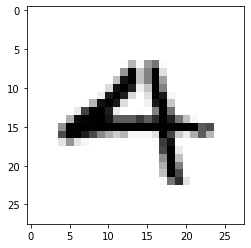

In [27]:
#make individual predictions
#image_index = 4444
image_index = 4465
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

## visualization with data augmentation

BEFORE:



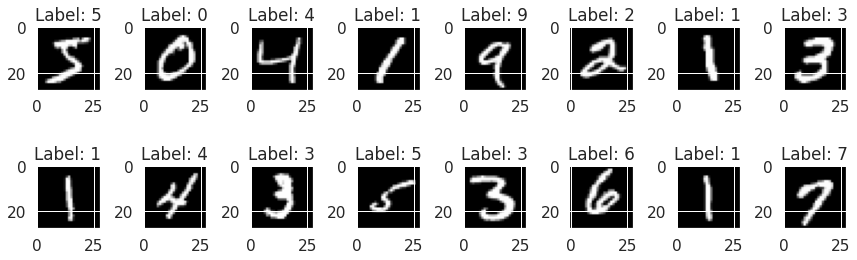

AFTER:



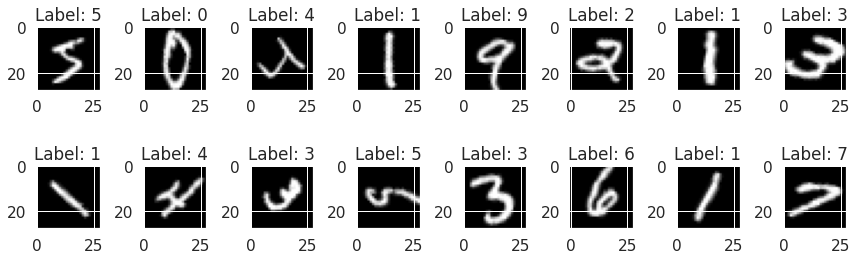

In [ ]:
# visualization with data augmentation
# create the class object
datagen = ImageDataGenerator(rotation_range=50, # rotation
                             # width_shift_range=0.2, # horizontal shift
                             # height_shift_range=0.2, # vertical shift
                              zoom_range=0.2, # zoom
                            #  brightness_range=[0.2,1.2], # brightness
                              rescale=1./255,)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i],cmap=plt.get_cmap('gray'))
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1),
                         y_train.reshape(y_train.shape[0], 1),
                         batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap=plt.get_cmap('gray'))
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()